# Dataset Description


The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database The database includes the following indicators:

country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

country_long (text): longer form of the country

designation name (text): name or title of the power plant, generally in Romanized form

gppd_idnr (text): 10 or 12 character identifier for the power plant

capacity_mw (number): electrical generating capacity in megawatts

latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel (text): energy source used in primary electricity generation or export

other_fuel1 (text): energy source used in electricity generation or export

other_fuel2 (text): energy source used in electricity generation or export

other_fuel3 (text): energy source used in electricity generation or export

commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

owner (text): majority shareholder of the power plant, generally in Romanized form

source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

url (text): web document corresponding to the source field

geolocation_source (text): attribution for geolocation information

wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data (number): year the capacity information was reported

generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source (text): attribution for the reported generation information

estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

We define the "Fuel Type" attribute of our database based on common fuel categories.



# Prediction :

Make two predictions: 1) Primary Fuel 
                      2) capacity_mw

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(908, 25)

In [5]:
#checking for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

#### columns 'other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh' are having null values more than 60%

In [6]:
#checking data type
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

##### There are 12 object and 13 numerical columns in data

# Data Preprocessing

In [8]:
#Dropping the columns which are having null values more than 60% of the data
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [9]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [10]:
df.shape

(908, 19)

In [11]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

In [12]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,520.0,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [13]:
df['year_of_capacity_data'].nunique()

1

### Removing column "year of capacity data because it having one unique value"

In [14]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [15]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [16]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [17]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [18]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [19]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

#### Droping some columns which is not nessesory

In [75]:
df.drop(columns=['country','country_long''url','gppd_idnr','name','commissioning_year','generation_data_source'],axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    908 non-null    object 
 1   gppd_idnr               908 non-null    object 
 2   capacity_mw             908 non-null    float64
 3   latitude                908 non-null    float64
 4   longitude               908 non-null    float64
 5   primary_fuel            908 non-null    object 
 6   commissioning_year      908 non-null    float64
 7   source                  908 non-null    object 
 8   url                     908 non-null    object 
 9   geolocation_source      908 non-null    object 
 10  generation_gwh_2013     908 non-null    float64
 11  generation_gwh_2014     908 non-null    float64
 12  generation_gwh_2015     908 non-null    float64
 13  generation_gwh_2016     908 non-null    float64
 14  generation_gwh_2017     908 non-null    fl

In [22]:
df.shape

(908, 16)

In [23]:
df.isnull().sum()

name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

## There are no more null values in the dataframe.

### Analyizing Target variable

In [24]:
df.primary_fuel.unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

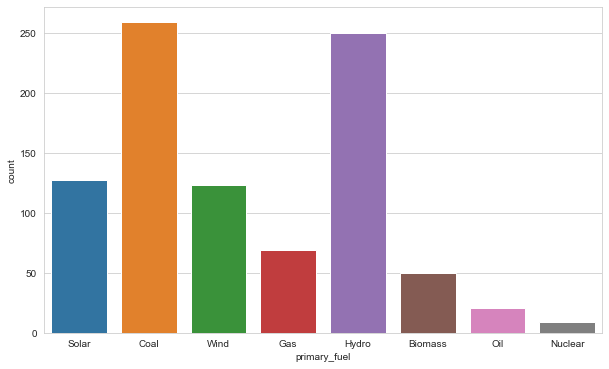

In [25]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)
plt.show()

#### There are 8 unique categories in primary_fuel,Out of which 'Coal' and 'Hydro' are maximum

In [26]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

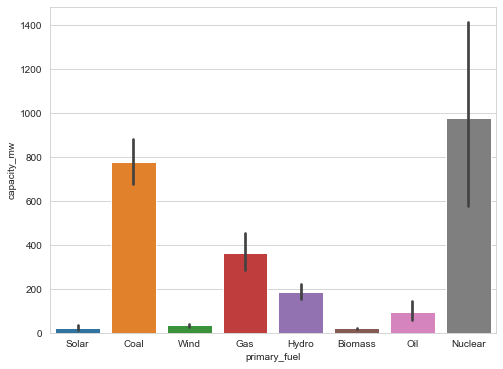

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="capacity_mw", data=df)
plt.show()

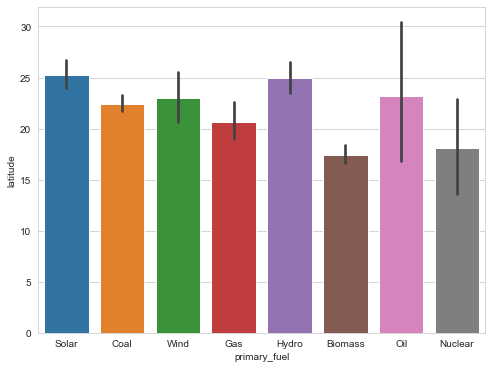

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="latitude", data=df)
plt.show()

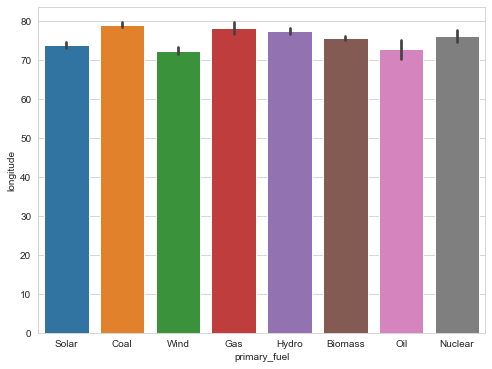

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="longitude", data=df)
plt.show()

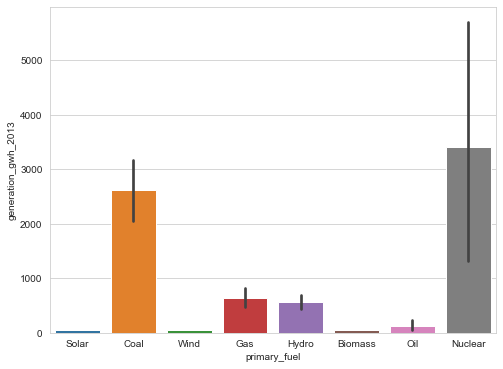

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="generation_gwh_2013", data=df)
plt.show()

####  Nuclear is most used fuel in 2013 and coal,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

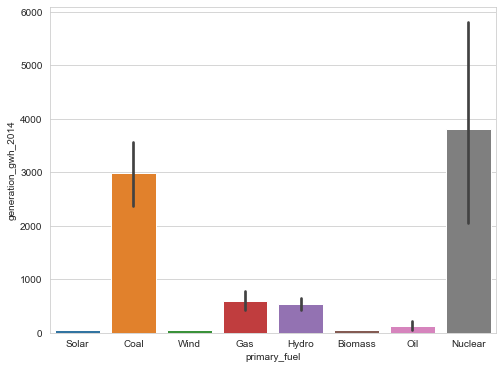

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="generation_gwh_2014", data=df)
plt.show()

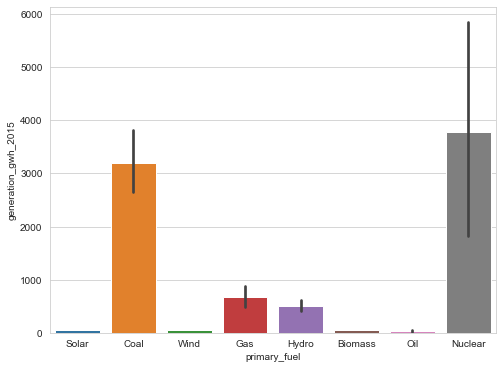

In [32]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="generation_gwh_2015", data=df)
plt.show()

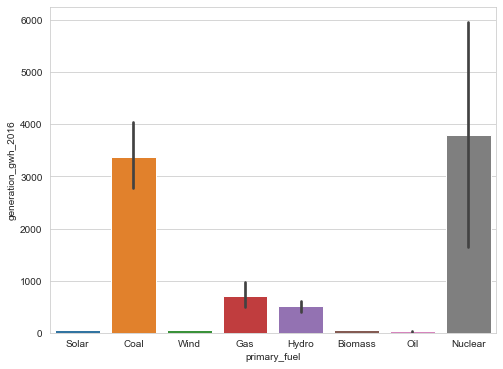

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="generation_gwh_2016", data=df)
plt.show()

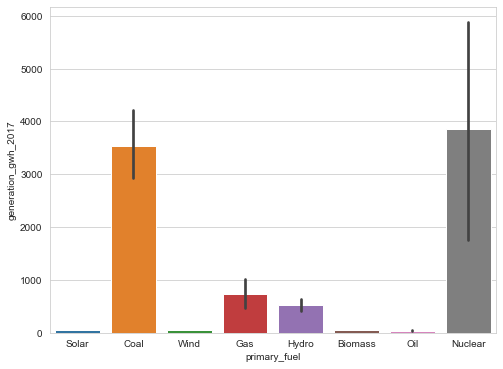

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(x="primary_fuel",y="generation_gwh_2017", data=df)
plt.show()

### Statistical Summary of Data:

In [36]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,23.162021,76.563926,1186.289648,1009.029442,1102.420396,1161.851056,1212.147753,1265.933067
std,580.221767,10.467197,6.125132,956.102221,2703.921589,2911.965280,3092.202997,3117.593315,3173.696579
min,0.000000,8.168900,60.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,73.812975,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
50%,60.000000,22.137800,76.492900,1978.000000,60.000000,60.000000,60.000000,60.000000,60.000000
75%,388.125000,26.740475,79.211600,2003.000000,470.116200,570.095213,605.769975,669.808766,708.134037
max,4760.000000,60.000000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


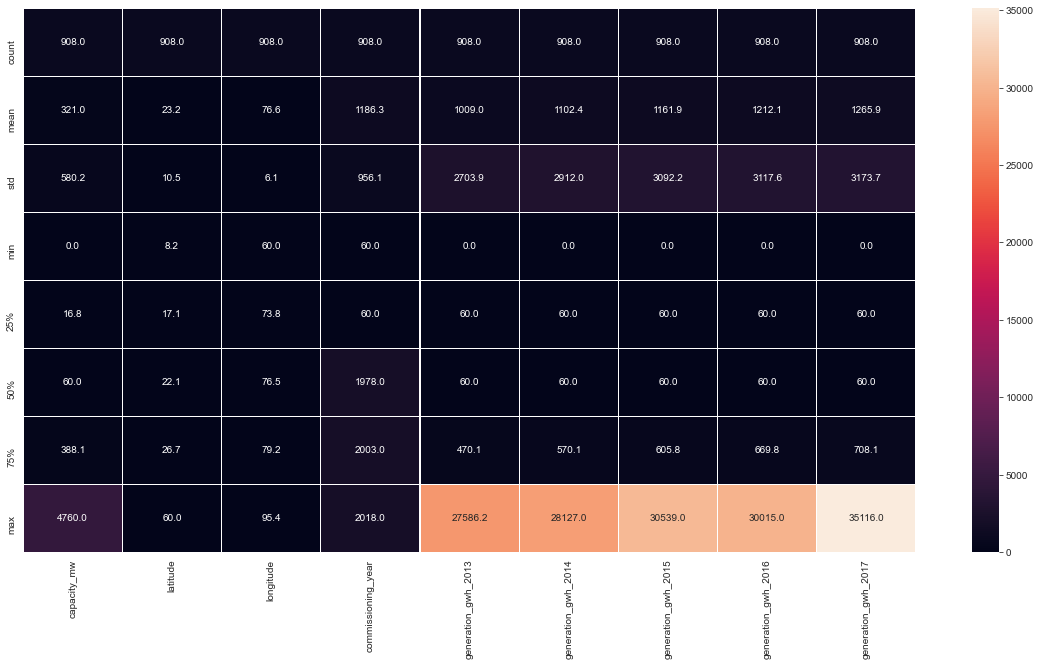

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Relationship between Independent and Dependent Variables

### Analyzing Target column

In [84]:
df.capacity_mw

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 908, dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

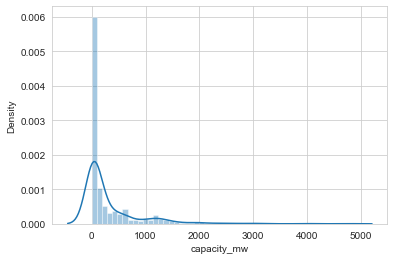

In [85]:
sns.distplot(df.capacity_mw)

In [86]:
df.select_dtypes(include = object).isnull().sum()

Series([], dtype: float64)

In [87]:
df.capacity_mw.skew()

3.1932573023446458

#### Distribution of data is right skewed.

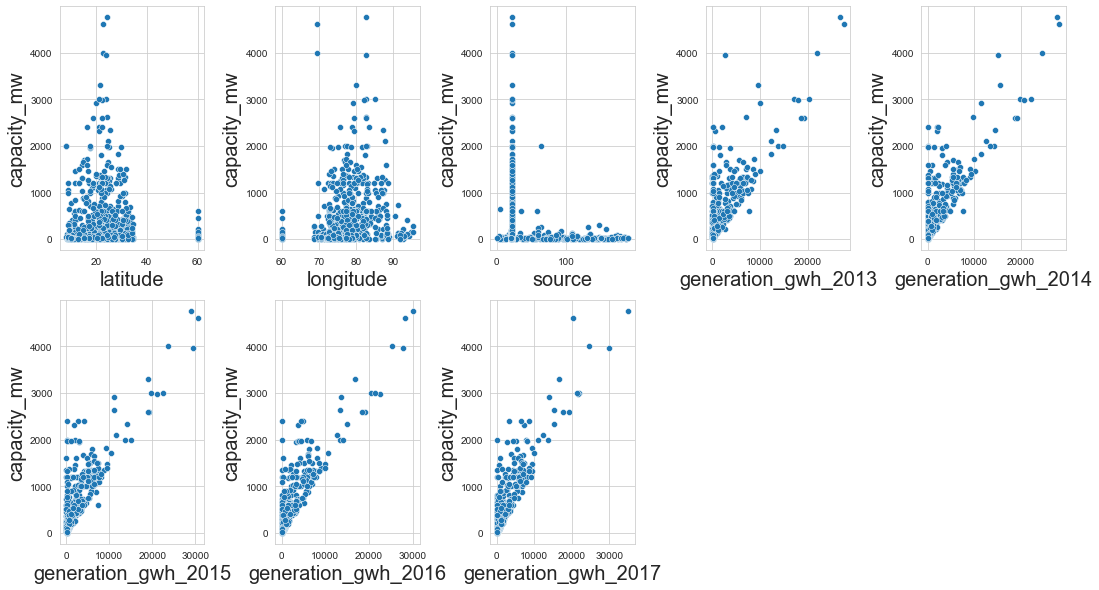

In [90]:
plt.figure(figsize=(15,20))
plotnum=1
y = df['capacity_mw']
X =  df.drop(columns=['capacity_mw','primary_fuel','geolocation_source'])
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.scatterplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('capacity_mw',fontsize=20)
    plotnum+=1
plt.tight_layout()

##### From the above graph we can see there is an linear relationship between columns generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017

<Figure size 576x432 with 0 Axes>

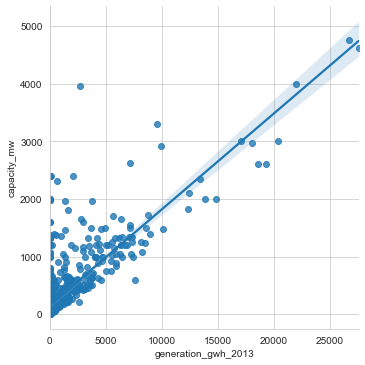

In [96]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2013",y="capacity_mw",data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

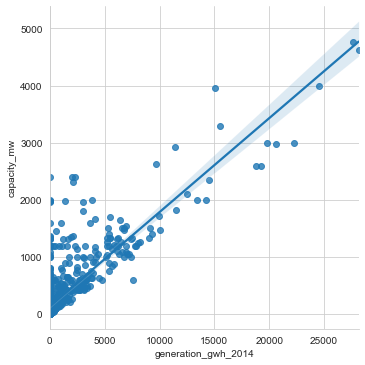

In [97]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2014",y="capacity_mw",data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

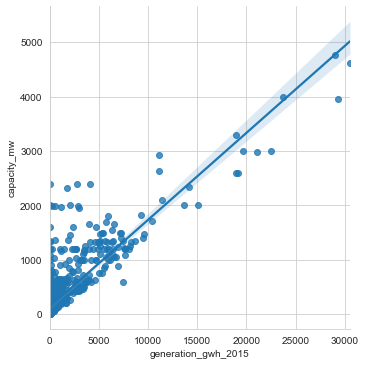

In [98]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2015",y="capacity_mw",data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

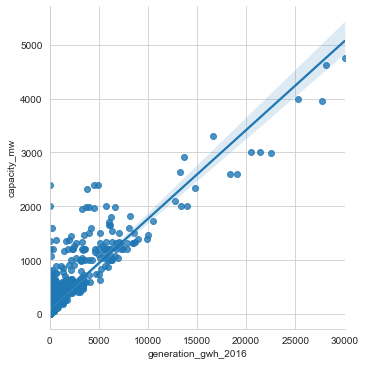

In [99]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2016",y="capacity_mw",data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

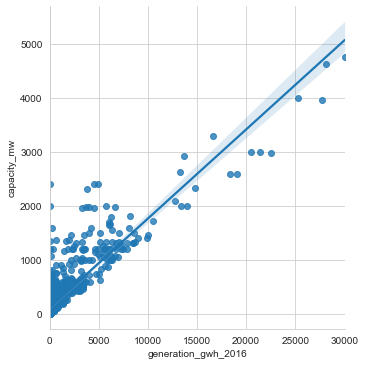

In [100]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2016",y="capacity_mw",data=df)
plt.show()

<Figure size 576x432 with 0 Axes>

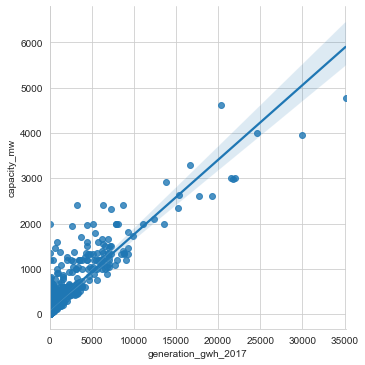

In [101]:
plt.figure(figsize=(8,6))
sns.lmplot(x="generation_gwh_2017",y="capacity_mw",data=df)
plt.show()

# Using LabelEncoder for convering categorical to numerical

In [102]:
from sklearn.preprocessing import LabelEncoder

In [103]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [104]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [105]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [106]:
df['geolocation_source'].unique()

array([1, 2, 0], dtype=int64)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int64  
 4   source               908 non-null    int64  
 5   geolocation_source   908 non-null    int64  
 6   generation_gwh_2013  908 non-null    float64
 7   generation_gwh_2014  908 non-null    float64
 8   generation_gwh_2015  908 non-null    float64
 9   generation_gwh_2016  908 non-null    float64
 10  generation_gwh_2017  908 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 78.2 KB


# Checking for Outliers :

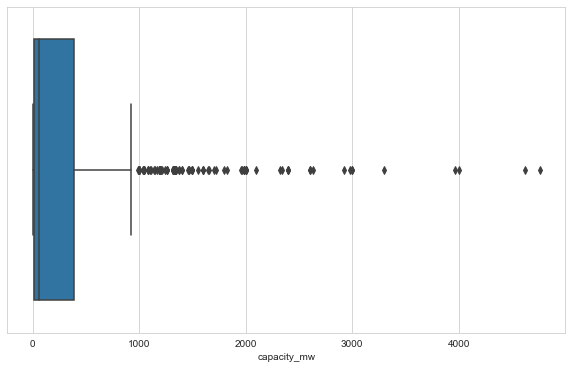

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(df['capacity_mw'])
plt.show()

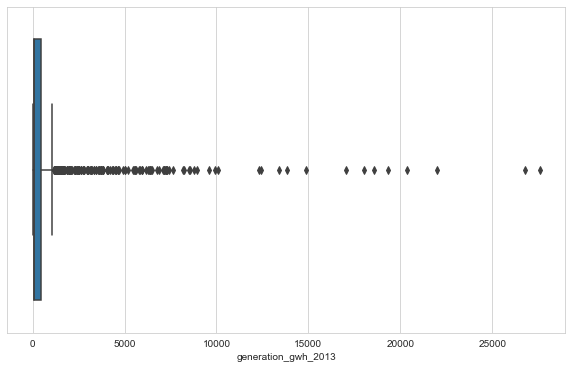

In [109]:
plt.figure(figsize=(10,6))
sns.boxplot(df['generation_gwh_2013'])
plt.show()

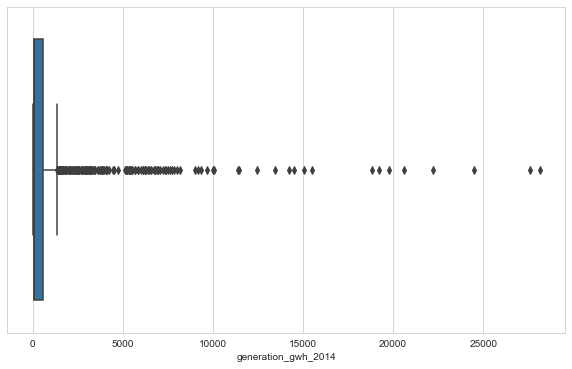

In [110]:
plt.figure(figsize=(10,6))
sns.boxplot(df['generation_gwh_2014'])
plt.show()

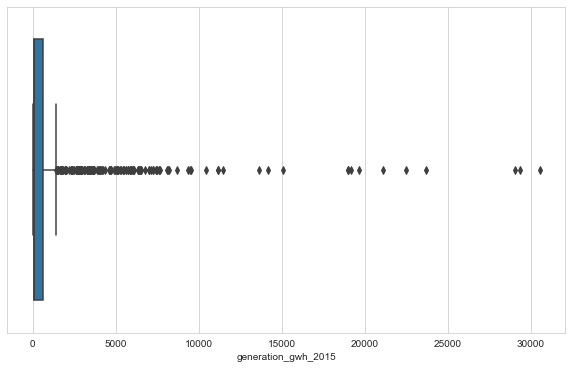

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(df['generation_gwh_2015'])
plt.show()

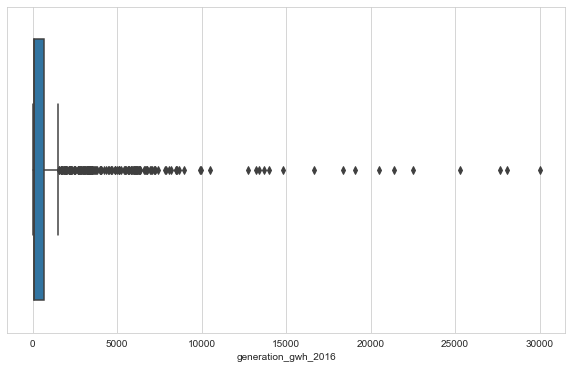

In [112]:
plt.figure(figsize=(10,6))
sns.boxplot(df['generation_gwh_2016'])
plt.show()

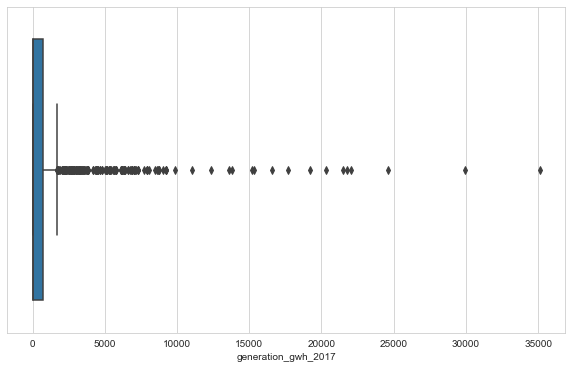

In [113]:
plt.figure(figsize=(10,6))
sns.boxplot(df['generation_gwh_2017'])
plt.show()

## All columns have a lot of outliers.

## Zscore for removing Outliers:

In [114]:
from scipy.stats import zscore

In [115]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,109,1,60.000000,60.000000,60.000,60.000000,60.000000
1,98.0,24.7663,74.6090,1,174,2,60.000000,60.000000,60.000,60.000000,60.000000
2,39.2,21.9038,69.3732,7,21,2,60.000000,60.000000,60.000,60.000000,60.000000
3,135.0,23.8712,91.3602,2,22,2,631.777928,617.789264,843.747,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,22,2,1668.290000,3035.550000,5916.370,6243.000000,5385.579736


In [116]:
DF = df.drop(columns=['latitude','longitude','primary_fuel','source','geolocation_source'])

In [117]:
zscor = zscore(DF)
z_score_abs = np.abs(zscor)

df1 = df[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [118]:
df1.shape

(885, 11)

In [119]:
df.shape

(908, 11)

# Percentage of Dataloss:

In [120]:
data_loss=(908-885)/908 * 100
data_loss

2.5330396475770924

### 2.53% is acceptable

# skewness:

In [224]:
df1.skew()

capacity_mw            2.052718
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013    2.994575
generation_gwh_2014    2.867788
generation_gwh_2015    2.684811
generation_gwh_2016    2.630710
generation_gwh_2017    2.540274
dtype: float64

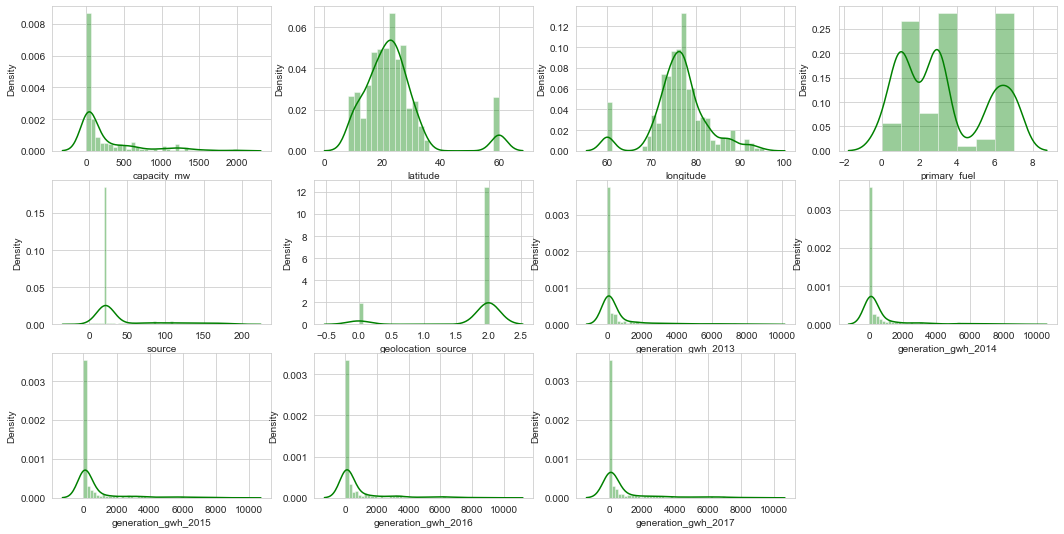

In [225]:
plt.figure(figsize=(18,25))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df1[i[1]],color='g')

# Removing Skewness using yeo-johnson method

In [226]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [227]:
skewd = ['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [228]:
df1[skewd] = scaler.fit_transform(df1[skewd].values)
df1[skewd].head()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-1.689076,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
1,0.240873,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
2,-0.262967,-0.471309,-0.460040,-0.458744,-0.474560,-0.475528
3,0.415568,0.870681,0.804080,0.942469,0.933082,0.755537
4,1.784019,1.385431,1.630555,1.923335,1.911582,1.802226


In [229]:
df1.skew()

capacity_mw            0.014952
latitude               1.965094
longitude             -0.179399
primary_fuel           0.430662
source                 1.788010
geolocation_source    -2.118329
generation_gwh_2013   -0.034887
generation_gwh_2014   -0.014669
generation_gwh_2015   -0.012333
generation_gwh_2016   -0.009262
generation_gwh_2017   -0.005003
dtype: float64

# Feature Selection

In [230]:
from sklearn.preprocessing import StandardScaler

In [231]:
X = df1.drop(['capacity_mw'],axis=1)
y = df1['capacity_mw']

In [232]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

# Principle Component Analysis

In [233]:
from sklearn.decomposition import PCA
pca = PCA()

In [234]:
pca_x = pca.fit_transform(scaled_X)

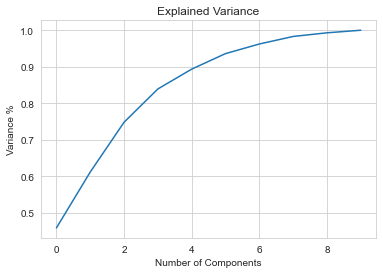

In [235]:
#visualize
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

# Model Building:

In [236]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Finding Best Random state:

# Linear Regression:

In [237]:
lr = LinearRegression()

In [239]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(scaled_X,y,test_size=0.2,random_state=i)
    lr.fit(X_train,y_train)
    lr_predict_train=lr.predict(X_train)
    lr_predict_test=lr.predict(X_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.5706282758268091
At random state 0, The test accuracy is: 0.6009379836512982


At random state 1, The training accuracy is: 0.5764546400215658
At random state 1, The test accuracy is: 0.5758673500328731


At random state 2, The training accuracy is: 0.6087565878291337
At random state 2, The test accuracy is: 0.42020046550349954


At random state 3, The training accuracy is: 0.5730111229777102
At random state 3, The test accuracy is: 0.5866077756857903


At random state 4, The training accuracy is: 0.5842019405390357
At random state 4, The test accuracy is: 0.5391679370409586


At random state 5, The training accuracy is: 0.5757488153177001
At random state 5, The test accuracy is: 0.567343921589064


At random state 6, The training accuracy is: 0.5915401653859658
At random state 6, The test accuracy is: 0.49644325121753186


At random state 7, The training accuracy is: 0.5764850685761391
At random state 7, The test accuracy is: 0.5719949787

#### Random state = 9,  giving highest accuracy.

## Spliting Data :

In [240]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=.27,random_state=5)

## Linear Regression:

In [241]:
lr = LinearRegression()

In [242]:
lr.fit(X_train,y_train)

LinearRegression()

In [243]:
lr.score(X_train,y_train)

0.5874585449074907

In [244]:
lr_pred = lr.predict(X_test)

In [245]:
print('MSE:',mean_squared_error(y_test,lr_pred))
print('MAE:',mean_absolute_error(y_test,lr_pred))
print('r2_score:',r2_score(y_test,lr_pred))

MSE: 0.4910717608077092
MAE: 0.5484850108374516
r2_score: 0.5415938531409746


## RandomForestRegressor

In [246]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [247]:
rf.score(X_train,y_train)

0.9680205771444197

In [248]:
rf_pred = rf.predict(X_test)

In [249]:
print('MSE:',mean_squared_error(y_test,rf_pred))
print('MAE:',mean_absolute_error(y_test,rf_pred))
print('r2_score:',r2_score(y_test,rf_pred))

MSE: 0.2716750950526656
MAE: 0.3617664895997645
r2_score: 0.7463964669525813


## DecisionTreeRegressor

In [250]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [251]:
dtc.score(X_train,y_train)

0.9920716813704553

In [252]:
dtc_pred = dtc.predict(X_test)

In [253]:
print('MSE:',mean_squared_error(y_test,dtc_pred))
print('MAE:',mean_absolute_error(y_test,dtc_pred))
print('r2_score:',r2_score(y_test,dtc_pred))

MSE: 0.42548189826757565
MAE: 0.45194495723404926
r2_score: 0.6028207420799399


## GradientBoostingRegressor

In [254]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [255]:
gbr.score(X_train,y_train)

0.8972034478296442

In [256]:
gbr_pred = gbr.predict(X_test)

In [257]:
print('MSE:',mean_squared_error(y_test,gbr_pred))
print('MAE:',mean_absolute_error(y_test,gbr_pred))
print('r2_score:',r2_score(y_test,gbr_pred))

MSE: 0.2697326129100231
MAE: 0.3733303508246885
r2_score: 0.7482097370801217


## Ridge:

In [258]:
R = Ridge()
R.fit(X_train,y_train)

Ridge()

In [259]:
R.score(X_train,y_train)

0.5874581885152659

In [260]:
R_pred = R.predict(X_test)

In [261]:
print('MSE:',mean_squared_error(y_test,R_pred))
print('MAE:',mean_absolute_error(y_test,R_pred))
print('r2_score:',r2_score(y_test,R_pred))

MSE: 0.49107034209176365
MAE: 0.5485188187422356
r2_score: 0.5415951774853209


# Cross Validation:

In [262]:
from sklearn.model_selection import cross_val_score

In [263]:
cvs = cross_val_score

### LinearRegression

In [264]:
print(cvs(lr,X,y,cv=5).mean())

0.5595233465199259


### RandomForestRegressor

In [265]:
print(cvs(rf,X,y,cv=5).mean())

0.7859756535794381


### DecisionTreeRegressor

In [266]:
print(cvs(dtc,X,y,cv=5).mean())

0.6402566352627509


### GradientBoostingRegressor

In [267]:
print(cvs(gbr,X,y,cv=5).mean())

0.7930058559870492


### Ridge

In [268]:
print(cvs(R,X,y,cv=5).mean())

0.5596552945910589


 #### According  to   all   metrics   score   selecting   the   GradientBoostingRegressoras    AND    RandomForestRegressor   for GridSeachCV

# Hyper Parameter Tuning:

In [269]:
from sklearn.model_selection import GridSearchCV

### GradientBoostingRegressor

In [277]:
GF=GradientBoostingRegressor()

In [278]:
parameter = {'criterion':['mse','mae'],'n_estimators':[100, 200],}

In [279]:
GCV = GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [280]:
GCV.fit(X_train,y_train)
GCV_pred = GCV.best_estimator_.predict(X_test)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [281]:
GCV.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 1, 'n_estimators': 50}

In [282]:
print('MSE:',mean_squared_error(GCV_pred,y_test))
print('MAE:',mean_absolute_error(GCV_pred,y_test))
print('r2_score:',r2_score(GCV_pred,y_test))

MSE: 0.2638643779015012
MAE: 0.3752336227327886
r2_score: 0.6472527746656215


### RandomForestRegressor

In [283]:
RF = RandomForestRegressor()

In [284]:
param = {'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}

In [285]:
glf = GridSearchCV(estimator=RF,param_grid=param,scoring='r2',n_jobs=-1)

In [286]:
glf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None], 'max_features': [1, 2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [287]:
glf.best_params_

{'bootstrap': False, 'max_depth': 10, 'max_features': 3, 'n_estimators': 50}

In [288]:
RF = RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)

In [289]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=3, n_estimators=50)

In [290]:
RF_pred = RF.predict(X_test)

In [291]:
print('MSE:',mean_squared_error(RF_pred,y_test))
print('MAE:',mean_absolute_error(RF_pred,y_test))
print('r2_score:',r2_score(RF_pred,y_test))

MSE: 0.2548937306543075
MAE: 0.3596914727778813
r2_score: 0.6754565830058703


##### Visualize:

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

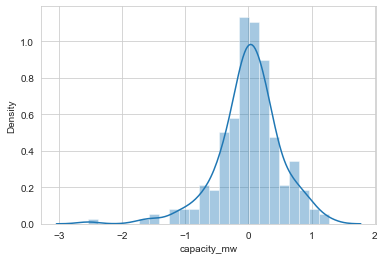

In [292]:
#RandomForest
sns.distplot(RF_pred-y_test)

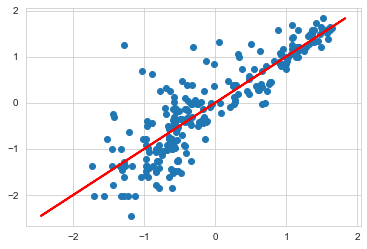

In [293]:
plt.scatter(RF_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

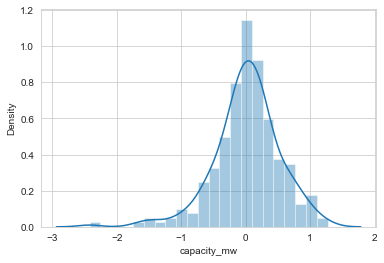

In [294]:
#GradientBoostingRegressor
sns.distplot(GCV_pred-y_test)

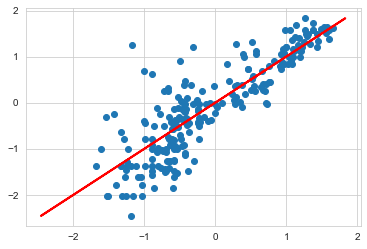

In [295]:
plt.scatter(GCV_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Choosing   RandomForestRegressor   as the best model

# saving:

In [296]:
import joblib

In [297]:
joblib.dump(RF,'Global Power Plant Regression.pkl')

['Global Power Plant Regression.pkl']

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# TAKING   'primary_fuel'   AS TARGET

### Spliting Data

In [301]:
X = df1.drop(['primary_fuel'],axis=1)
y = df1['primary_fuel']

In [302]:
X.shape

(885, 10)

In [303]:
y.shape

(885,)

# Spliting Data:

In [304]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.27,random_state=42)

In [305]:
X_train.shape

(646, 10)

In [306]:
X_test.shape

(239, 10)

In [307]:
y_train.shape

(646,)

In [308]:
y_test.shape

(239,)

# MODEL BUILDING:

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

# LogisticRegression:

In [311]:
LR = LogisticRegression()
LR_score = cross_val_score(LR , X, y, cv=5, scoring='accuracy')
print("cross validation score:",np.mean(LR_score))

cross validation score: 0.5853107344632769


In [312]:
LR.fit(X_train,y_train)

LogisticRegression()

In [313]:
LR_pred = LR.predict(X_test)

In [314]:
print(accuracy_score(y_test,LR_pred))
print(confusion_matrix(y_test,LR_pred))
print(classification_report(y_test,LR_pred))
print("Training accuracy::",LR.score(X_train,y_train))
print("Test accuracy::",LR.score(X_test,y_test))

0.5774058577405857
[[ 9  0  0  3  0  0  0  0]
 [ 6 44  1 12  0  0  0  5]
 [ 0 10  2  7  0  0  0  0]
 [ 0 11  0 42  0  0  0 15]
 [ 0  1  0  0  0  0  0  1]
 [ 2  1  0  0  0  0  0  2]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0 23  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.65      0.65      0.65        68
           2       0.67      0.11      0.18        19
           3       0.48      0.62      0.54        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       1.00      0.97      0.98        30
           7       0.34      0.34      0.34        35

    accuracy                           0.58       239
   macro avg       0.46      0.43      0.41       239
weighted avg       0.58      0.58      0.56       239

Training accuracy:: 0.6160990712074303
Test accuracy:: 0.5774058577405857


# DECISION TREE CLASSIFIER

In [319]:
dtc = DecisionTreeClassifier()
dtc_score = cross_val_score(dtc,X,y,cv=5,scoring='accuracy')
print("cross validation score for DECISION TREE CLASSIFIER :",np.mean(dtc_score))

cross validation score for DECISION TREE CLASSIFIER : 0.7819209039548023


In [321]:
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

In [322]:
print(accuracy_score(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(classification_report(y_test,dtc_pred))
print("Training accuracy::",dtc.score(X_train,y_train))
print("Test accuracy::",dtc.score(X_test,y_test))

0.7824267782426778
[[11  1  0  0  0  0  0  0]
 [ 1 44  6 11  2  4  0  0]
 [ 0  4  7  7  0  1  0  0]
 [ 0  5  4 58  1  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  1  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.77      0.65      0.70        68
           2       0.37      0.37      0.37        19
           3       0.76      0.85      0.81        68
           4       0.00      0.00      0.00         2
           5       0.38      0.60      0.46         5
           6       1.00      0.97      0.98        30
           7       1.00      1.00      1.00        35

    accuracy                           0.78       239
   macro avg       0.65      0.67      0.65       239
weighted avg       0.79      0.78      0.78       239

Training accuracy:: 1.0
Test accuracy:: 0.7824267782426778


# KNeighborsClassifier:

In [323]:
knn = KNeighborsClassifier()

In [324]:
knn_score = cross_val_score(knn,X,y,cv=5,scoring='accuracy')
print("cross validation score for KNeighborsClassifier :",np.mean(knn_score))

cross validation score for KNeighborsClassifier : 0.7401129943502824


In [325]:
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test) 

In [326]:
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
print("Training accuracy::",knn.score(X_train,y_train))
print("Test accuracy::",knn.score(X_test,y_test))

0.7405857740585774
[[ 8  2  1  0  0  0  1  0]
 [ 2 49  5  6  0  0  5  1]
 [ 1  2  7  8  0  0  0  1]
 [ 0  6  0 57  0  0  0  5]
 [ 0  0  1  0  0  0  0  1]
 [ 1  1  1  1  0  0  1  0]
 [ 5  3  0  1  0  0 21  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        12
           1       0.78      0.72      0.75        68
           2       0.47      0.37      0.41        19
           3       0.78      0.84      0.81        68
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.75      0.70      0.72        30
           7       0.81      1.00      0.90        35

    accuracy                           0.74       239
   macro avg       0.51      0.54      0.52       239
weighted avg       0.72      0.74      0.73       239

Training accuracy:: 0.8173374613003096
Test accuracy:: 0.7405857740585774


# RandomForestClassifier

In [328]:
rf = RandomForestClassifier()
rf_score = cross_val_score(rf,X,y,cv=5,scoring='accuracy')
print("cross validation score for rf:",np.mean(rf_score))

cross validation score for rf: 0.8485875706214688


In [329]:
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [330]:
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
print("Training accuracy::",rf.score(X_train,y_train))
print("Test accuracy::",rf.score(X_test,y_test))

0.8284518828451883
[[12  0  0  0  0  0  0  0]
 [ 6 51  1  8  0  2  0  0]
 [ 0  2  3 12  0  2  0  0]
 [ 0  4  0 64  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.85      0.75      0.80        68
           2       0.60      0.16      0.25        19
           3       0.76      0.94      0.84        68
           4       0.00      0.00      0.00         2
           5       0.43      0.60      0.50         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.83       239
   macro avg       0.66      0.68      0.65       239
weighted avg       0.82      0.83      0.81       239

Training accuracy:: 1.0
Test accuracy:: 0.8284518828451883


# Gradient Boosting classifier

In [331]:
gb = GradientBoostingClassifier()
gb_score = cross_val_score(gb,X,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(gb_score))

cross validation score for Gradient Boosting Classifier: 0.8417900919305413


In [332]:
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

In [333]:
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))
print("Training accuracy::",gb.score(X_train,y_train))
print("Test accuracy::",gb.score(X_test,y_test))

0.8200836820083682
[[12  0  0  0  0  0  0  0]
 [ 5 49  1  9  2  2  0  0]
 [ 0  5  8  5  0  1  0  0]
 [ 0  6  1 61  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  3  0  0  1  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       0.78      0.72      0.75        68
           2       0.62      0.42      0.50        19
           3       0.81      0.90      0.85        68
           4       0.00      0.00      0.00         2
           5       0.25      0.20      0.22         5
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        35

    accuracy                           0.82       239
   macro avg       0.65      0.65      0.64       239
weighted avg       0.81      0.82      0.81       239

Training accuracy:: 1.0
Test accuracy:: 0.8200836820083682


# RandomForestClassifier as Best model 

# HYPER PARAMETER TUNING:

### RandomForestRegressor

In [336]:
rfc = RandomForestRegressor()

In [337]:
param = {'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}

In [339]:
gcv = GridSearchCV(estimator=rfc,param_grid=param,scoring='r2',n_jobs=-1)

In [340]:
gcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 50, None], 'max_features': [1, 2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [341]:
gcv.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'n_estimators': 100}

In [342]:
rfc = RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=50)

In [343]:
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=3, n_estimators=50)

In [344]:
rfc_pred = rfc.predict(X_test)

In [347]:
print('MSE:',mean_squared_error(rfc_pred,y_test))
print('MAE:',mean_absolute_error(rfc_pred,y_test))
print('r2_score:',r2_score(rfc_pred,y_test))

MSE: 0.5543700973165344
MAE: 0.4481787339795863
r2_score: 0.8699839023782606


# RandomForestClassifier is best model with 86.99%

# Visualize:

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

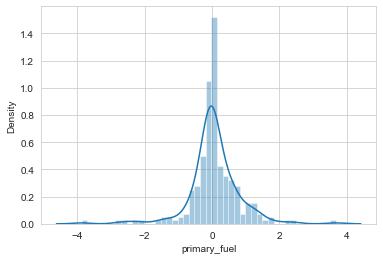

In [349]:
#RandomForest
sns.distplot(rfc_pred-y_test)

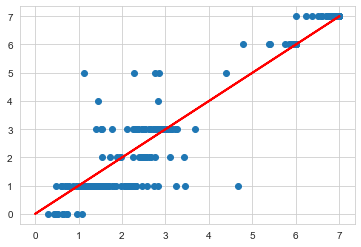

In [350]:
plt.scatter(rfc_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

# Saving Model:

In [351]:
import joblib

In [352]:
joblib.dump(rfc,'GlobalPower Classification.pkl')

['GlobalPower Classification.pkl']